# Влияние проведения фестивалей на спрос авиаперевозок

Необходимо построить графики зависимостей модели самолета и числа выполняемых рейсов, направления вылета и количестства рейсов


1. [Открытие исходных данных](#start)


2. [Изучение данных и проверка типов на корректность](#preprocessing)
   * [Заполнение пропусков](#null)
   * [Изменение типов даных](#change_types)
   * [Удаление дубликатов](#dublicated)
    
    
3. [Топ-10 городов по количеству рейсов](#top10)


4. [Графики зависимостей](#graph)
   * [Частота продаж в завимсимости от площади, высоты потолков, числа комнат](#frequency)
   * [Изучение длительности продаж](#time)
   * [Влияние на цену основных показателей квартиры](#factor)
   * [Наиболее популярные населенные пункты](#top_10)
   * [Изучение стоимости квартир в центра города](#centr)


5. [Заключение. Общий вывод](#resume)

*информация об аэропортах:*

* __``airport_code``__ — *трёхбуквенный код аэропорта*
* __``airport_name``__ — *название аэропорта*
* __``city``__ — *город*
* __``timezone``__ — *временная зона*

*информация о самолётах:*

* __``aircraft_code``__ — *код модели самолёта*
* __``model``__ — *модель самолёта*
* __``range``__ — *количество самолётов*

*информация о билетах:*

* __``ticket_no``__ — *уникальный номер билета*
* __``passenger_id``__ — *персональный идентификатор пассажира*
* __``passenger_name``__ — *имя и фамилия пассажира*

*информация о рейсах:*

* __``flight_id``__ — *уникальный идентификатор рейса*
* __``departure_airport``__ — *аэропорт вылета*
* __``departure_time``__ — *дата и время вылета*
* __``arrival_airport``__ — *аэропорт прилёта*
* __``arrival_time``__ — *дата и время прилёта*
* __``aircraft_code``__ — *id самолёта*

*стыковая таблица «рейсы-билеты»*

* __``ticket_no``__ — *номер билета*
* __``flight_id``__ — *идентификатор рейса*

*информация о фестивалях*

* __``festival_id``__ — *уникальный номер фестиваля*
* __``festival_date``__ — *дата проведения фестиваля*
* __``festival_city``__ — *город проведения фестиваля*
* __``festival_name``__ — *название фестиваля*

# Открытие исходных даных
<a id="start"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
try:
    model = pd.read_csv('d:/Home/datasets/query_1.csv')
    av_flight = pd.read_csv('d:/Home/datasets/query_3.csv')
except:
    model = pd.read_csv('/datasets/query_1.csv')
    av_flight = pd.read_csv('/datasets/query_3.csv')



# Изучение данных и проверка типов на корректность
<a id="preprocessing"></a>

In [3]:
model.sample(5)

,model,flights_amount
3,Boeing 767-300,600
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
5,Bombardier CRJ-200,4446


In [4]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
model.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [6]:
#model.unique()
model.duplicated().sum()

0

In [7]:
model['model'].sort_values().unique()

array(['Airbus A319-100', 'Airbus A321-200', 'Boeing 737-300',
       'Boeing 767-300', 'Boeing 777-300', 'Bombardier CRJ-200',
       'Cessna 208 Caravan', 'Sukhoi SuperJet-100'], dtype=object)

In [8]:
model.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Пропусков нет, дубликатов нет,  приведение к регистру не нужно, типы данных корректные для соотвествующих данных, возможно переименовать признак модели для дальнейшего анализа. Например все Boeing собрать в одну группу

In [9]:
av_flight.sample(3)

,city,average_flights
2,Анапа,2.161290
84,Ульяновск,9.580645
76,Стрежевой,1.000000


In [10]:
av_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [11]:
av_flight.isnull().sum()

city               0
average_flights    0
dtype: int64

In [12]:
av_flight.duplicated().sum()

0

In [13]:
av_flight['city'].sort_values().unique()

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

In [14]:
av_flight.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Пропусков нет, дубликатов нет,  приведение к регистру или переименовывание не нужно, типы данных корректные для соотвествующих данных. Половина рейсов выполняется в населенные пункты , где число рейсов за период не превышает 3, в 75% числа населенных пунктов количесвто рейсов  не превышает 6

# ТОП-10 городов по количеству рейсов
<a id="top10"></a>

In [15]:
top_10 = av_flight \
            .sort_values(by='average_flights', ascending=False) \
            .head(10)
top_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


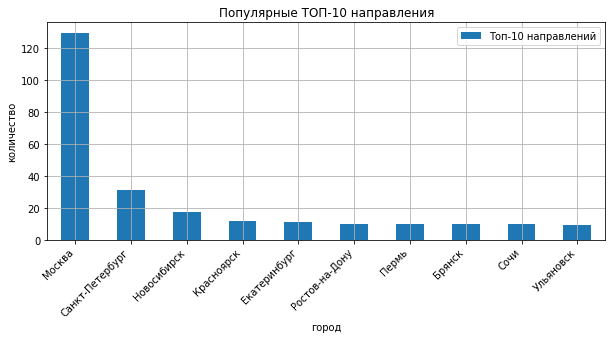

In [16]:
ax = top_10 \
        .plot(x='city' \
              ,y='average_flights' \
              ,kind='bar' \
              ,figsize=(10, 4) \
              ,grid=True);

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Популярные ТОП-10 направления');
ax.legend(["Топ-10 направлений"]);
ax.set_xlabel('город');
ax.set_ylabel('количество');

Москва явно лидирует по количеству рейсов, связано ли это с проведением фестиваля , информации недостаточно (отсутствуют даты рейсов)

# Графики зависимостей
<a id="graph"></a>

модели самолетов и количество рейсов. Объединим все модифицации Boeing и Airbus  в две группы

In [17]:
model['model_n'] = model['model'].str.replace('Boeing+[0-9 -]+','Boeing')
model['model_n'] = model['model_n'].str.replace('Airbus+[A0-9 -]+','Airbus')
model

c:\users\av_zaslonyuk\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
c:\users\av_zaslonyuk\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,model,flights_amount,model_n
0,Airbus A319-100,607,Airbus
1,Airbus A321-200,960,Airbus
2,Boeing 737-300,630,Boeing
3,Boeing 767-300,600,Boeing
4,Boeing 777-300,300,Boeing
5,Bombardier CRJ-200,4446,Bombardier CRJ-200
6,Cessna 208 Caravan,4557,Cessna 208 Caravan
7,Sukhoi SuperJet-100,4185,Sukhoi SuperJet-100


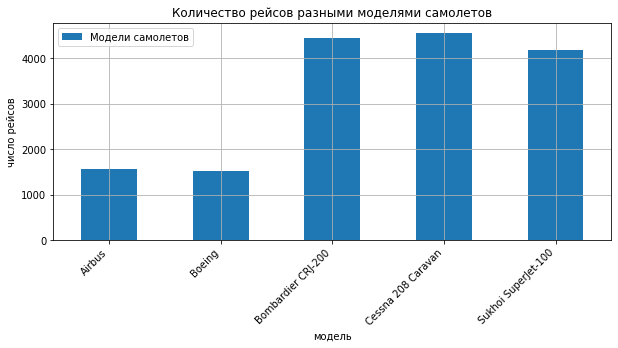

In [18]:
ax = model \
        .groupby('model_n')['flights_amount'] \
        .sum() \
        .plot(x='model_n' \
              ,y='flights_amount' \
              ,kind='bar' \
              ,figsize=(10, 4) \
              ,grid=True);

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Количество рейсов разными моделями самолетов');
ax.legend(["Модели самолетов"]);
ax.set_xlabel('модель');
ax.set_ylabel('число рейсов');



In [19]:
model_gr = model \
        .groupby('model_n', as_index=False)['flights_amount'] \
        .sum().sort_values(by='flights_amount', ascending=False) 
model_gr

,model_n,flights_amount
3,Cessna 208 Caravan,4557
2,Bombardier CRJ-200,4446
4,Sukhoi SuperJet-100,4185
0,Airbus,1567
1,Boeing,1530


А теперь в виде долей по числк рейсов

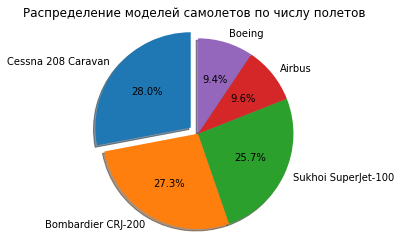

In [20]:
labels = model_gr.model_n;
explode = (0.1, 0, 0, 0, 0)

fig, ax = plt.subplots()
ax.pie(model_gr['flights_amount'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
ax.set_title("Распределение моделей самолетов по числу полетов")

plt.show()

Авиарейсы в основном выполняются на моделях малой вместимости самолетов.  Бюджетные самолеты для авиакомпаний  либо рейсы небольшой протяженности. Самолеты авиагигантов не популярны, доля выполненных рейсов на них около 19%



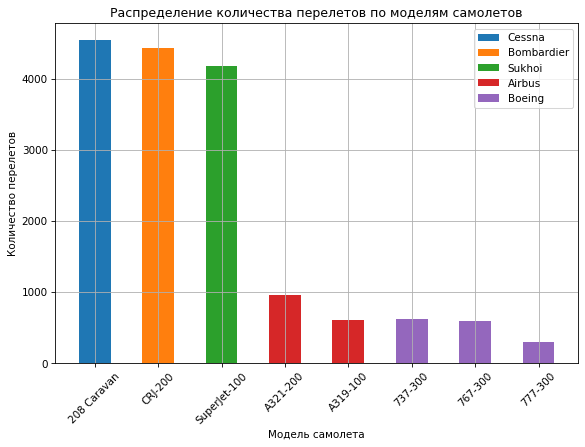

In [21]:
viz_flights_models = model\
    .assign(aircraft_comp = lambda row: row['model'].str.split(expand=True, n=1).iloc[:, 0])\
    .assign(aircraft_model = lambda row: row['model'].str.split(expand=True, n=1).iloc[:, 1])\
    .sort_values(by=['flights_amount', 'aircraft_comp'], ascending=[False, False])
	
plt.figure(figsize=(9, 6), dpi=75)
for idx, comp in enumerate(viz_flights_models['aircraft_comp'].unique()):
    tmp = viz_flights_models[viz_flights_models['aircraft_comp']==comp]
    plt.bar(x=tmp['aircraft_model'], height=tmp['flights_amount'], width=0.5, label=comp)
plt.title('Распределение количества перелетов по моделям самолетов')
plt.xlabel('Модель самолета')
plt.ylabel('Количество перелетов')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<hr style="border: 2px solid orange;" />

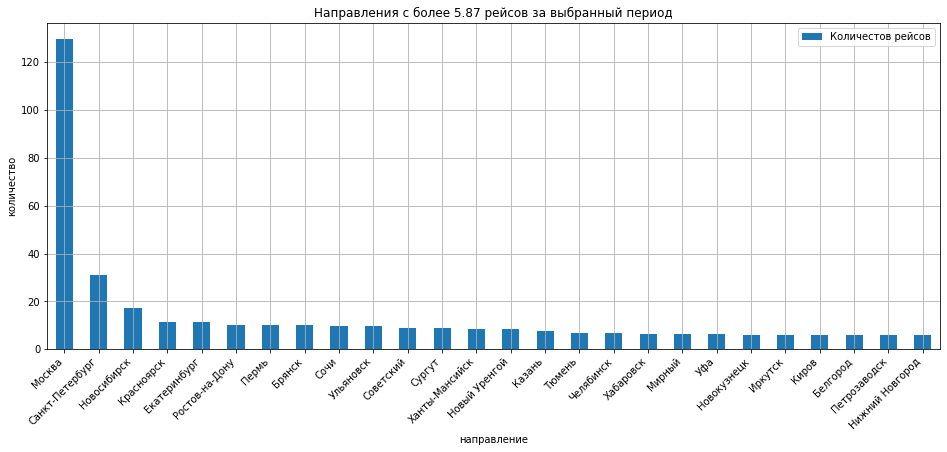

In [22]:
ax =  av_flight \
            .query('average_flights > 5.87 ') \
            .sort_values(by='average_flights', ascending=False) \
            .plot(x='city' \
                  ,y='average_flights' \
                  ,kind='bar' \
                  ,figsize=(16, 6) \
                  ,grid=True);

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Направления с более 5.87 рейсов за выбранный период');
ax.legend(["Количестов рейсов"]);
ax.set_xlabel('направление');
ax.set_ylabel('количество');

Третий квартиль равен 5.87, тут представлены города в которые совершается 75% всех рейсов

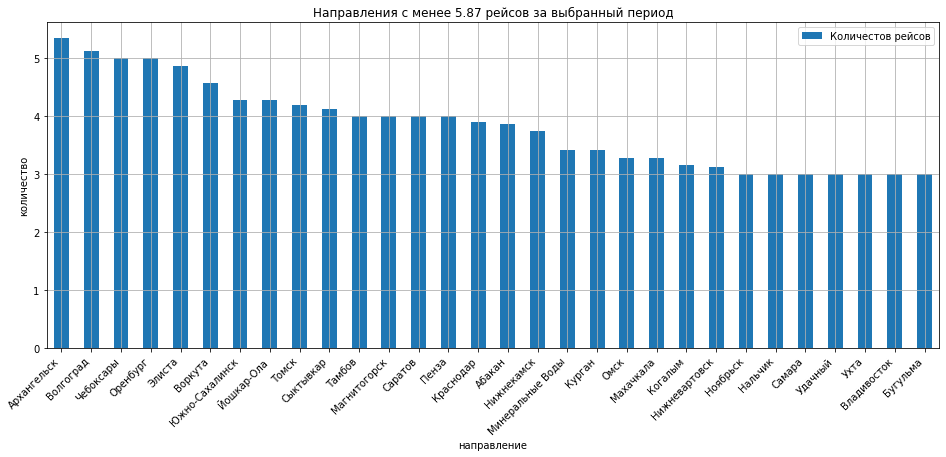

In [23]:
ax =  av_flight \
            .query('5.87 > average_flights >= 3') \
            .sort_values(by='average_flights', ascending=False) \
            .plot(x='city' \
                  ,y='average_flights' \
                  ,kind='bar' \
                  ,figsize=(16, 6) \
                  ,grid=True);

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Направления с менее 5.87 рейсов за выбранный период');
ax.legend(["Количестов рейсов"]);
ax.set_xlabel('направление');
ax.set_ylabel('количество');

Второй квартиль равен 3. На графике выведенв населенные пункты вкоторые совершаетмя более половины всех рейсов, но не прваышающих 75% от общего числа

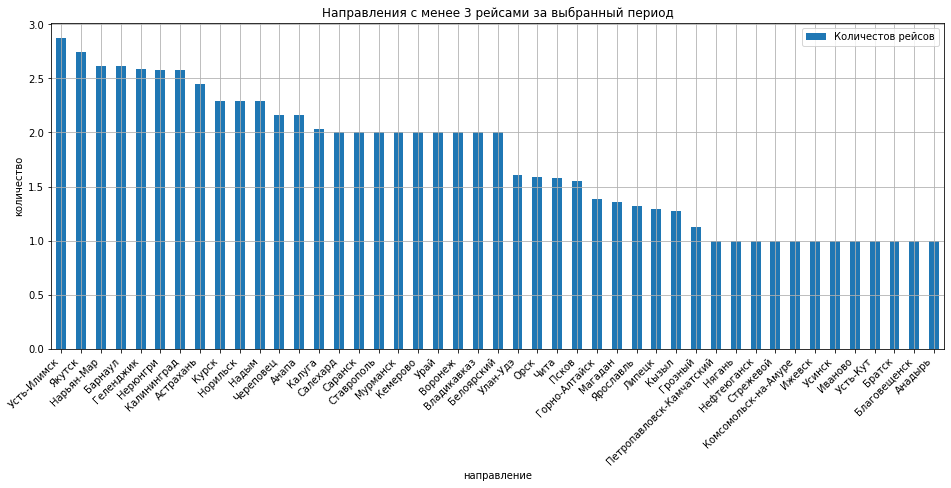

In [24]:
ax =  av_flight \
            .query('3 > average_flights') \
            .sort_values(by='average_flights', ascending=False) \
            .plot(x='city' \
                  ,y='average_flights' \
                  ,kind='bar' \
                  ,figsize=(16, 6) \
                  ,grid=True);

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Направления с менее 3 рейсами за выбранный период');
ax.legend(["Количестов рейсов"]);
ax.set_xlabel('направление');
ax.set_ylabel('количество');

In [25]:
%matplotlib inline
import ipywidgets as ipw
from ipywidgets import interact
import matplotlib.pyplot as plt

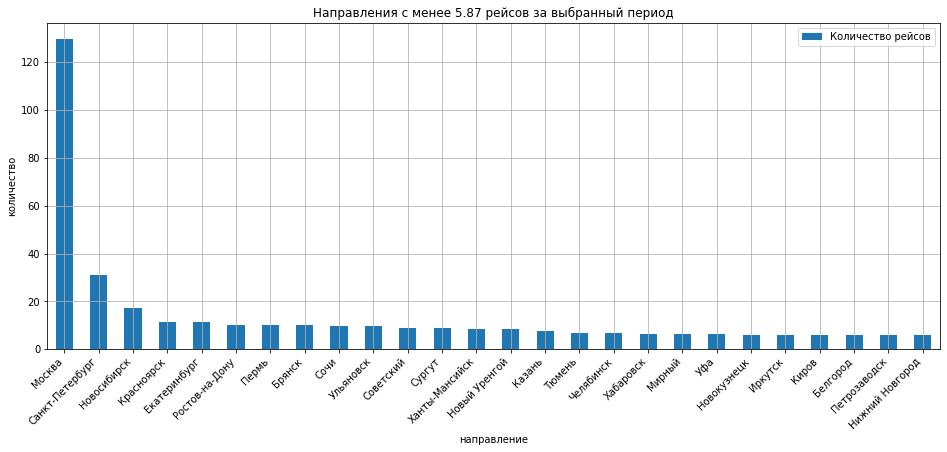

In [26]:
@interact(flights=['average_flights > 5.87 ', '5.87 > average_flights >= 3', '3 > average_flights'])
def f(flights):
    ax =  av_flight \
                .query(flights) \
                .sort_values(by='average_flights', ascending=False) \
                .plot(x='city' \
                      ,y='average_flights' \
                      ,kind='bar' \
                      ,figsize=(16, 6) \
                      ,grid=True);

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
    ax.set_title('Направления с менее 5.87 рейсов за выбранный период');
    ax.legend(["Количество рейсов"]);
    ax.set_xlabel('направление');
    ax.set_ylabel('количество');

Города в которые совершается половина всех рейсов.

Количество рейсов имеет резкий пик для направления Москва. Направления на крупные города-миллионники имеют примерно одинаковое число рейсов в среднем не более 6. Далее очень плавный спад по числу рейсов. Половина рейсов совершается в населенные пункты, в которые среднее число рейсов не превышает 3 за выбранный период. Самолеты Boeing и Airbus не являются основными самолетами компаний. Доля полетов на данных моделях составляют менее 19%